<a href="https://colab.research.google.com/github/jayaasuthersen/EDA_DA/blob/main/21BDS0126_JayaaSuthersen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data=pd.read_csv("Dataset.csv")

In [21]:
# Shape of the dataset
print("Dataset dimensions (rows, columns):", data.shape)

# Preview the dataset
print(data.head())

# Column names
print("Column names:", data.columns.tolist())



Dataset dimensions (rows, columns): (5818, 67)
  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  24/02/2020            5          5   
1      AFG      Asia  Afghanistan  25/02/2020            5          0   
2      AFG      Asia  Afghanistan  26/02/2020            5          0   
3      AFG      Asia  Afghanistan  27/02/2020            5          0   
4      AFG      Asia  Afghanistan  28/02/2020            5          0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facili

In [22]:
# Data types, non-null values, and memory usage
print(data.info())

# Statistical summary of numerical columns
print(data.describe())

# Summary of categorical columns
categorical_columns = ['iso_code', 'continent', 'location']
print(data[categorical_columns].describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5818 entries, 0 to 5817
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    5818 non-null   object 
 1   continent                                   5818 non-null   object 
 2   location                                    5818 non-null   object 
 3   date                                        5818 non-null   object 
 4   total_cases                                 5818 non-null   int64  
 5   new_cases                                   5818 non-null   int64  
 6   new_cases_smoothed                          5788 non-null   float64
 7   total_deaths                                5638 non-null   float64
 8   new_deaths                                  5627 non-null   float64
 9   new_deaths_smoothed                         5596 non-null   float64
 10  total_cases_

In [23]:
# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print("Duplicates:", data.duplicated().sum())


iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
human_development_index                       0
excess_mortality_cumulative_absolute       5397
excess_mortality_cumulative                5397
excess_mortality                           5397
excess_mortality_cumulative_per_million    5397
Length: 67, dtype: int64
Duplicates: 0


In [24]:
# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

# Check for duplicates
print("Number of duplicate rows:", data.duplicated().sum())

# Handle duplicates
data = data.drop_duplicates()


Missing values per column:
 iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
human_development_index                       0
excess_mortality_cumulative_absolute       5397
excess_mortality_cumulative                5397
excess_mortality                           5397
excess_mortality_cumulative_per_million    5397
Length: 67, dtype: int64
Number of duplicate rows: 0


In [25]:
# Fill missing numerical values with median
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

# Fill missing categorical values with mode
for col in categorical_columns:
    # Check if mode is empty before accessing element 0
    mode_values = data[col].mode()
    if not mode_values.empty:
        data[col] = data[col].fillna(mode_values.iloc[0])  # Use iloc to access by position

# Re-check for missing values
print("Missing values after cleaning:\n", data.isnull().sum())

Missing values after cleaning:
 iso_code                                   0
continent                                  0
location                                   0
date                                       0
total_cases                                0
                                          ..
human_development_index                    0
excess_mortality_cumulative_absolute       0
excess_mortality_cumulative                0
excess_mortality                           0
excess_mortality_cumulative_per_million    0
Length: 67, dtype: int64


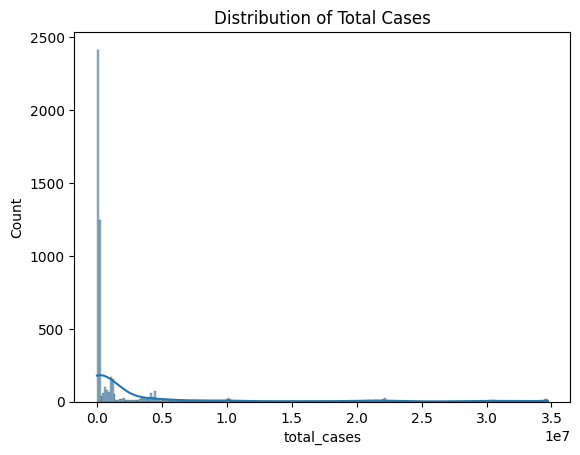

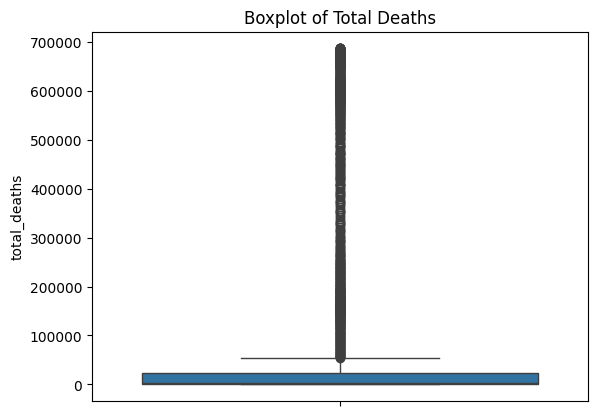

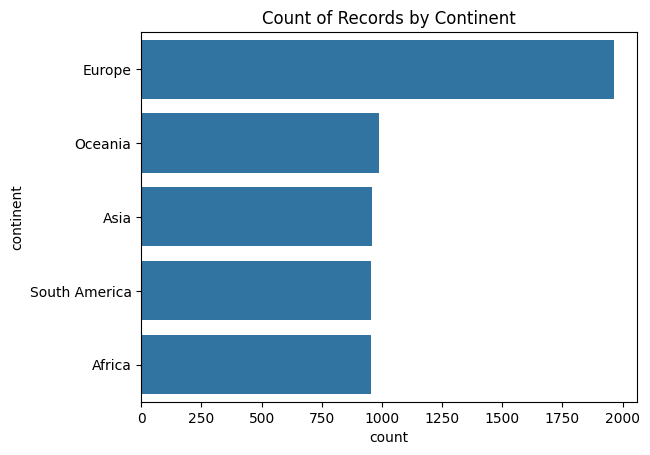

In [26]:
# Distribution of total cases
sns.histplot(data['total_cases'], kde=True)
plt.title("Distribution of Total Cases")
plt.show()

# Boxplot for total deaths
sns.boxplot(data['total_deaths'])
plt.title("Boxplot of Total Deaths")
plt.show()

# Countplot for continent
sns.countplot(y=data['continent'], order=data['continent'].value_counts().index)
plt.title("Count of Records by Continent")
plt.show()


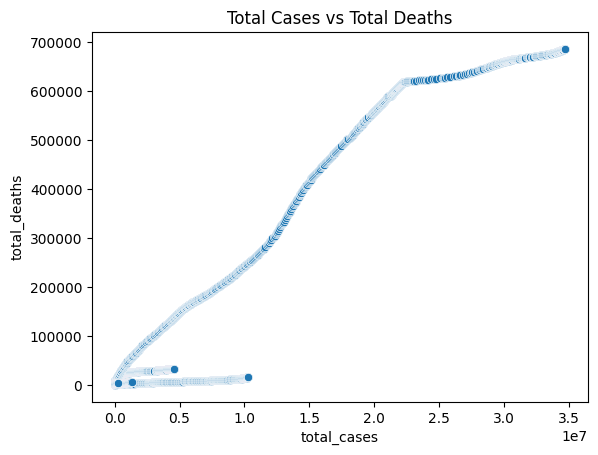

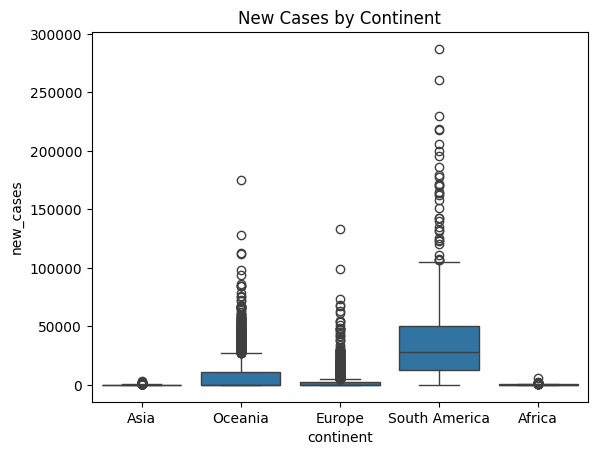

In [29]:
# Scatter plot: Total cases vs Total deaths
sns.scatterplot(x='total_cases', y='total_deaths', data=data)
plt.title("Total Cases vs Total Deaths")
plt.show()



# Boxplot: New cases per continent
sns.boxplot(x='continent', y='new_cases', data=data)
plt.title("New Cases by Continent")
plt.show()


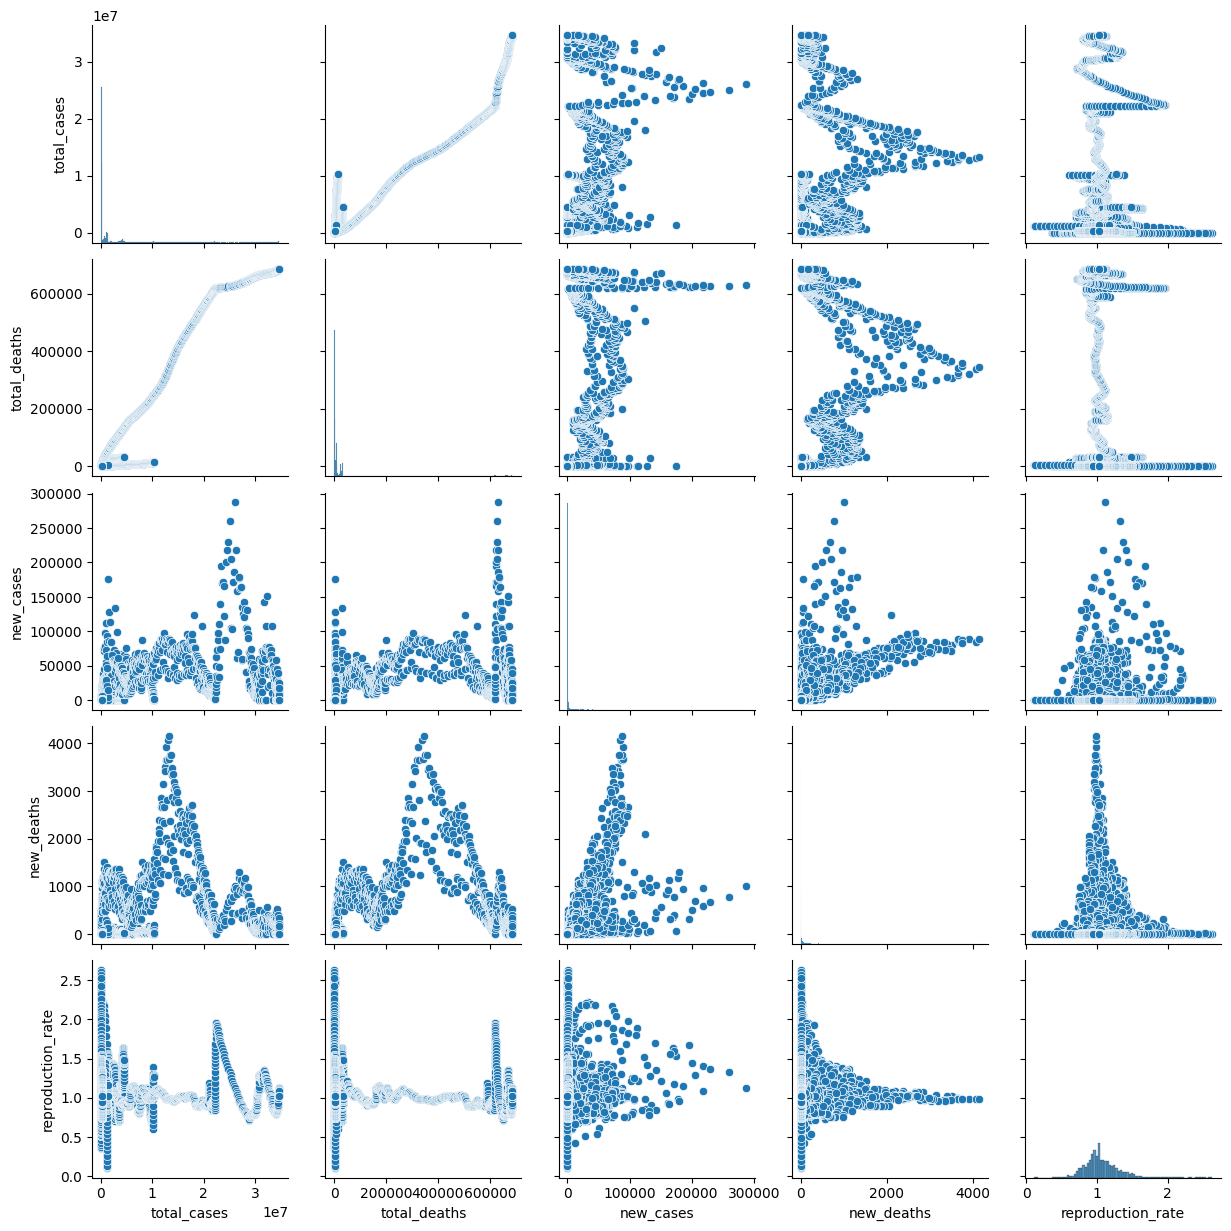

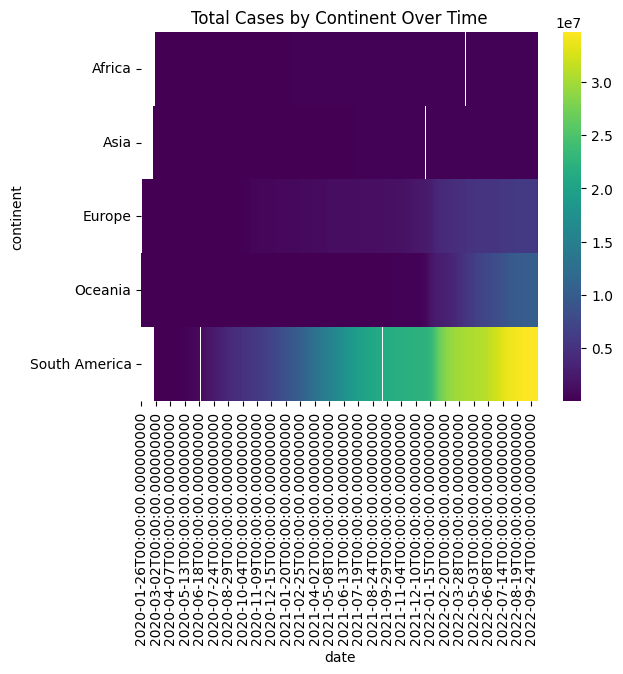

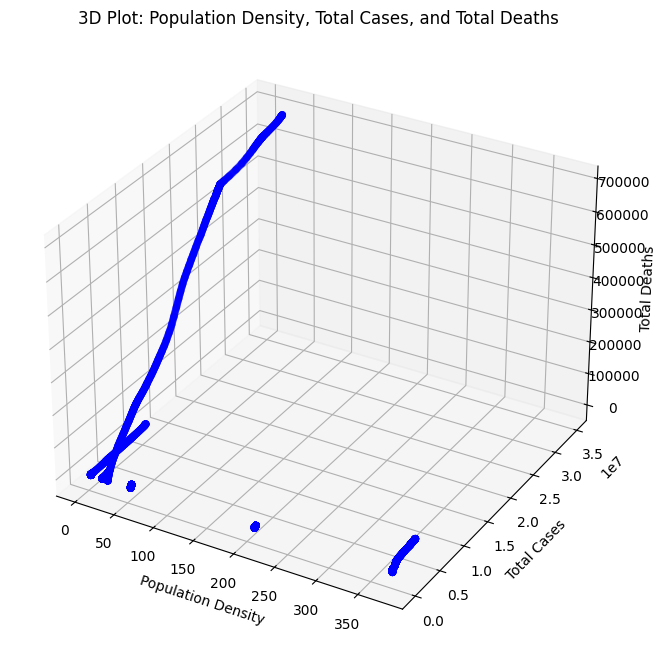

In [30]:
# Pairplot for key attributes
key_attributes = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'reproduction_rate']
sns.pairplot(data[key_attributes])
plt.show()

# Multivariate heatmap: Cases by continent over time
pivot_table = data.pivot_table(values='total_cases', index='continent', columns='date', aggfunc='sum')
sns.heatmap(pivot_table, cmap='viridis')
plt.title("Total Cases by Continent Over Time")
plt.show()

# 3D scatter plot for population density, total cases, and total deaths
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['population_density'], data['total_cases'], data['total_deaths'], c='blue', marker='o')
ax.set_xlabel('Population Density')
ax.set_ylabel('Total Cases')
ax.set_zlabel('Total Deaths')
plt.title("3D Plot: Population Density, Total Cases, and Total Deaths")
plt.show()
